In [1]:
import pandas as pd

In [2]:
path = '../data/data.csv'
df = pd.read_csv(path)

In [3]:
emotions = ["amazement", "solemnity", "tenderness", "nostalgia", "calmness", "power", "joyful_activation", "tension", "sadness"]

track_id_df = df.iloc[:,0]
emotions_df = df.iloc[:,2:-6]
emotions_df

,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness
0,0,1,0,0,0,0,1,1,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0
4,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
8402,1,1,0,0,0,0,1,0,0
8403,0,0,0,1,0,0,1,0,1
8404,0,0,0,0,0,0,0,1,0
8405,1,0,0,0,0,0,1,1,0


In [4]:
weights_df = pd.DataFrame(df["track id"])

weights_df["n_labelled_emotions"] = emotions_df.sum(axis=1)
weights_df["n_labelled_emotions"][weights_df["n_labelled_emotions"] == 0] = 3.0
weights_df["weight"] = 1/weights_df["n_labelled_emotions"]

In [5]:
for i, emotion in enumerate(emotions):
    df.iloc[:,i+2] = emotions_df.iloc[:,i] * weights_df["weight"]

In [6]:
weightsDF = weights_df.groupby(weights_df["track id"]).sum()
weightsDF

,n_labelled_emotions,weight
track id,,
1,103,27.833333
2,93,29.333333
3,91,28.166667
4,92,23.333333
5,93,25.166667
...,...,...
396,23,7.833333
397,21,7.333333
398,24,6.500000


In [7]:
emotionsDF = df.groupby(df["track id"]).agg(["mean"]).reset_index()
emotionsDF

,track id,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness,mood,liked,disliked,age,gender
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,1,0.052083,0.135417,0.076389,0.152778,0.361111,0.006944,0.031250,0.020833,0.142361,3.437500,0.395833,0.166667,35.833333,0.395833
1,2,0.042553,0.063830,0.223404,0.148936,0.439716,0.021277,0.007092,0.010638,0.042553,3.595745,0.553191,0.085106,35.680851,0.468085
2,3,0.061594,0.199275,0.054348,0.072464,0.025362,0.152174,0.228261,0.141304,0.065217,3.739130,0.434783,0.152174,35.521739,0.521739
3,4,0.043651,0.071429,0.210317,0.214286,0.369048,0.007937,0.000000,0.023810,0.059524,3.761905,0.428571,0.095238,36.071429,0.571429
4,5,0.045455,0.140152,0.128788,0.234848,0.162879,0.018939,0.026515,0.079545,0.162879,3.840909,0.613636,0.068182,35.863636,0.545455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,0.111111,0.125000,0.083333,0.250000,0.180556,0.000000,0.111111,0.083333,0.055556,3.750000,0.333333,0.166667,31.083333,0.750000
396,397,0.045455,0.045455,0.030303,0.060606,0.121212,0.151515,0.000000,0.242424,0.303030,3.818182,0.181818,0.272727,30.272727,0.727273
397,398,0.166667,0.000000,0.000000,0.121212,0.151515,0.060606,0.287879,0.151515,0.060606,3.909091,0.454545,0.272727,32.727273,0.545455


In [8]:
# Rename columns
emotionsDF.columns = ["track id",
                      "amazement",
                      "solemnity",
                     "tenderness",
                     "nostalgia",
                     "calmness",
                     "power",
                     "joyful_activation",
                     "tension",
                     "sadness",
                     "mood",
                     "liked",
                     "disliked",
                     "age",
                     "gender"] 

In [9]:
genres = ["classical" for i in range(100)] + ["electronic" for j in range(100)] + ["pop" for k in range(100)] + ["rock" for m in range(100)]
emotionsDF.insert(loc = 1, column = 'genre', value = genres)

Nobservations = df['track id'].value_counts(sort=False, ascending=False).tolist()
emotionsDF.insert(loc = 2, column = 'number_of_observations', value = Nobservations)

In [10]:
emotionsDF

,track id,genre,number_of_observations,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness,mood,liked,disliked,age,gender
0,1,classical,48,0.052083,0.135417,0.076389,0.152778,0.361111,0.006944,0.031250,0.020833,0.142361,3.437500,0.395833,0.166667,35.833333,0.395833
1,2,classical,47,0.042553,0.063830,0.223404,0.148936,0.439716,0.021277,0.007092,0.010638,0.042553,3.595745,0.553191,0.085106,35.680851,0.468085
2,3,classical,46,0.061594,0.199275,0.054348,0.072464,0.025362,0.152174,0.228261,0.141304,0.065217,3.739130,0.434783,0.152174,35.521739,0.521739
3,4,classical,42,0.043651,0.071429,0.210317,0.214286,0.369048,0.007937,0.000000,0.023810,0.059524,3.761905,0.428571,0.095238,36.071429,0.571429
4,5,classical,44,0.045455,0.140152,0.128788,0.234848,0.162879,0.018939,0.026515,0.079545,0.162879,3.840909,0.613636,0.068182,35.863636,0.545455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,rock,12,0.111111,0.125000,0.083333,0.250000,0.180556,0.000000,0.111111,0.083333,0.055556,3.750000,0.333333,0.166667,31.083333,0.750000
396,397,rock,11,0.045455,0.045455,0.030303,0.060606,0.121212,0.151515,0.000000,0.242424,0.303030,3.818182,0.181818,0.272727,30.272727,0.727273
397,398,rock,11,0.166667,0.000000,0.000000,0.121212,0.151515,0.060606,0.287879,0.151515,0.060606,3.909091,0.454545,0.272727,32.727273,0.545455
398,399,rock,12,0.125000,0.020833,0.215278,0.215278,0.243056,0.027778,0.055556,0.000000,0.097222,3.750000,0.416667,0.166667,30.750000,0.500000


In [11]:
weightsDF = weightsDF.reset_index()
scale = emotionsDF["number_of_observations"] / weightsDF["weight"]

In [12]:
for i, emotion in enumerate(emotions):
    emotionsDF[emotion] = emotionsDF[emotion] * scale

In [13]:
emotionsDF

,track id,genre,number_of_observations,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness,mood,liked,disliked,age,gender
0,1,classical,48,0.089820,0.233533,0.131737,0.263473,0.622754,0.011976,0.053892,0.035928,0.245509,3.437500,0.395833,0.166667,35.833333,0.395833
1,2,classical,47,0.068182,0.102273,0.357955,0.238636,0.704545,0.034091,0.011364,0.017045,0.068182,3.595745,0.553191,0.085106,35.680851,0.468085
2,3,classical,46,0.100592,0.325444,0.088757,0.118343,0.041420,0.248521,0.372781,0.230769,0.106509,3.739130,0.434783,0.152174,35.521739,0.521739
3,4,classical,42,0.078571,0.128571,0.378571,0.385714,0.664286,0.014286,0.000000,0.042857,0.107143,3.761905,0.428571,0.095238,36.071429,0.571429
4,5,classical,44,0.079470,0.245033,0.225166,0.410596,0.284768,0.033113,0.046358,0.139073,0.284768,3.840909,0.613636,0.068182,35.863636,0.545455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,rock,12,0.170213,0.191489,0.127660,0.382979,0.276596,0.000000,0.170213,0.127660,0.085106,3.750000,0.333333,0.166667,31.083333,0.750000
396,397,rock,11,0.068182,0.068182,0.045455,0.090909,0.181818,0.227273,0.000000,0.363636,0.454545,3.818182,0.181818,0.272727,30.272727,0.727273
397,398,rock,11,0.282051,0.000000,0.000000,0.205128,0.256410,0.102564,0.487179,0.256410,0.102564,3.909091,0.454545,0.272727,32.727273,0.545455
398,399,rock,12,0.327273,0.054545,0.563636,0.563636,0.636364,0.072727,0.145455,0.000000,0.254545,3.750000,0.416667,0.166667,30.750000,0.500000


In [14]:
emotionsDF.to_csv("weighted_labels.csv", index=False)

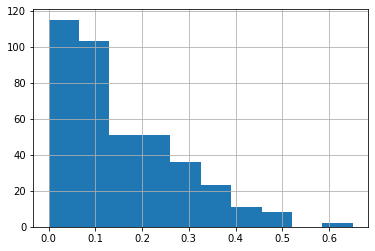

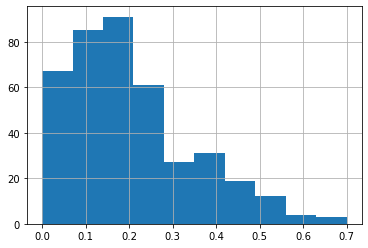

In [20]:
import matplotlib.pyplot as plt

emotion = "solemnity"

emotionsDF[emotion].hist()
plt.show()
nonweighted = pd.read_csv("labels.csv")
nonweighted[emotion].hist()
plt.show()